In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 빨간색 HSV 범위 설정
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

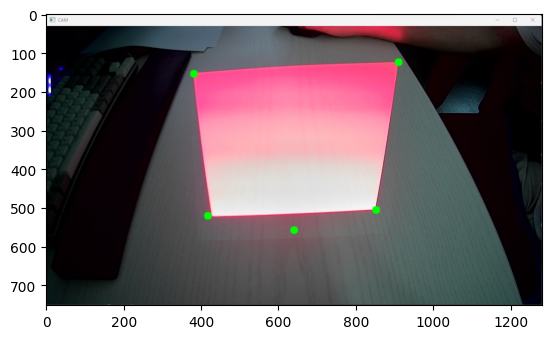

In [20]:
frame = cv2.imread('test.png')

# BGR을 HSV로 변환
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# 빨간색 범위에 해당하는 부분을 마스크로 만듦
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)  # 0-10도 범위의 빨간색
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)  # 170-180도 범위의 빨간색
mask = mask1 + mask2

# 마스크를 적용하여 빨간색 부분만 추출
red_detected = cv2.bitwise_and(frame, frame, mask=mask)

# 결과 출력
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

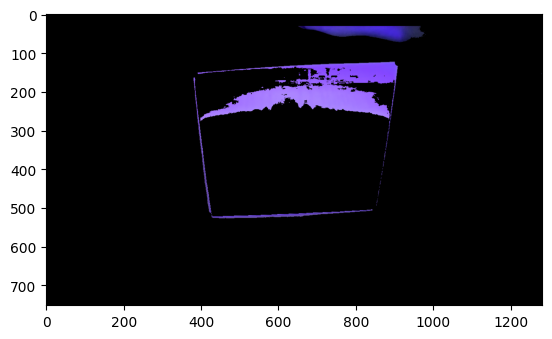

In [21]:
plt.imshow(red_detected)

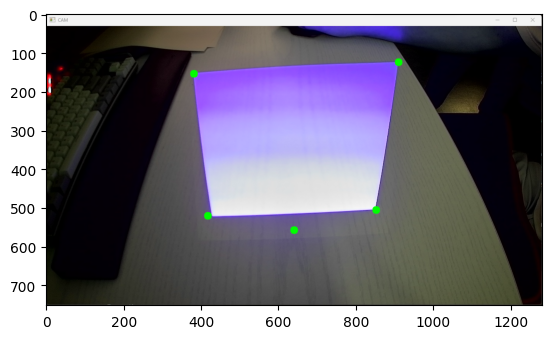

In [23]:
# 가우시안 블러 적용 (노이즈 제거)
blurred = cv2.GaussianBlur(frame, (5, 5), 0)

# Canny 에지 감지 적용
edges = cv2.Canny(blurred, 50, 150)

# 컨투어 찾기
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 가장 큰 컨투어 찾기 (투사된 영역의 테두리일 가능성이 높음)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    # 다각형 근사화 (테두리가 사각형일 것으로 가정)
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)

    if len(approx) == 4:  # 사각형을 찾음
        # 사각형의 꼭짓점 좌표 출력
        for i, corner in enumerate(approx):
            x, y = corner.ravel()
            print(f"Corner {i+1}: x={x}, y={y}")
            # 꼭짓점 표시
            cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)

        # 사각형의 테두리를 그리기
        cv2.drawContours(frame, [approx], -1, (0, 255, 0), 3)

# 결과 출력
plt.imshow(frame)